In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Imports required libraries and configures warnings; sets up plotting and machine learning tools.

In [4]:
# بارگذاری داده‌ها (فقط ۴ دسته برای سرعت)
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# بارگذاری داده‌های آموزش و تست
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

X_train = newsgroups_train.data
y_train = newsgroups_train.target

X_test = newsgroups_test.data
y_test = newsgroups_test.target

print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Classes: {newsgroups_train.target_names}")

Train set size: 2257
Test set size: 1502
Classes: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


Loads the 20 Newsgroups dataset (4 categories) and prepares training and test sets, printing sizes and class names.

In [5]:
# لیستی از مدل‌ها و تنظیماتشون
models = []

# مقادیر alpha
alphas = [0.1, 0.5, 1, 5, 10]

# 1. Multinomial NB + CountVectorizer
for alpha in alphas:
    name = f'MultinomialNB (Count, alpha={alpha})'
    model = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', MultinomialNB(alpha=alpha))
    ])
    models.append((name, model))

# 2. Multinomial NB + TfidfVectorizer
for alpha in alphas:
    name = f'MultinomialNB (TF-IDF, alpha={alpha})'
    model = Pipeline([
        ('vectorizer', TfidfVectorizer()),
        ('classifier', MultinomialNB(alpha=alpha))
    ])
    models.append((name, model))

# 3. Bernoulli NB + CountVectorizer
for alpha in alphas:
    name = f'BernoulliNB (Count, alpha={alpha})'
    model = Pipeline([
        ('vectorizer', CountVectorizer(binary=True)),  # binary=True برای Bernoulli ضروریه
        ('classifier', BernoulliNB(alpha=alpha))
    ])
    models.append((name, model))

# 4. Bernoulli NB + TfidfVectorizer
for alpha in alphas:
    name = f'BernoulliNB (TF-IDF, alpha={alpha})'
    model = Pipeline([
        ('vectorizer', TfidfVectorizer(binary=True)),  # binary=True برای Bernoulli
        ('classifier', BernoulliNB(alpha=alpha))
    ])
    models.append((name, model))

print(f"✅ {len(models)} مدل تعریف شد.")

✅ 20 مدل تعریف شد.


Defines a list of Naive Bayes model pipelines (Multinomial and Bernoulli) with different alpha values and vectorizer choices (Count/Tf-IDF).

In [6]:
# لیستی برای ذخیره نتایج
results = {
    'Model Name': [],
    'Accuracy': [],
    'F1-Score': [],
    'Confusion Matrix': []
}

# آموزش و ارزیابی هر مدل
for i, (name, model) in enumerate(models):
    print(f"\n--- Training Model {i+1}/{len(models)}: {name} ---")
    
    # آموزش مدل
    model.fit(X_train, y_train)
    
    # پیش‌بینی
    y_pred = model.predict(X_test)
    
    # محاسبه معیارها
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # weighted برای چند کلاسی
    cm = confusion_matrix(y_test, y_pred)
    
    # ذخیره نتایج
    results['Model Name'].append(name)
    results['Accuracy'].append(acc)
    results['F1-Score'].append(f1)
    results['Confusion Matrix'].append(cm)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-Score (weighted): {f1:.4f}")


--- Training Model 1/20: MultinomialNB (Count, alpha=0.1) ---
Accuracy: 0.8435
F1-Score (weighted): 0.8443

--- Training Model 2/20: MultinomialNB (Count, alpha=0.5) ---
Accuracy: 0.8362
F1-Score (weighted): 0.8368

--- Training Model 3/20: MultinomialNB (Count, alpha=1) ---
Accuracy: 0.8103
F1-Score (weighted): 0.8102

--- Training Model 4/20: MultinomialNB (Count, alpha=5) ---
Accuracy: 0.6238
F1-Score (weighted): 0.5948

--- Training Model 5/20: MultinomialNB (Count, alpha=10) ---
Accuracy: 0.5087
F1-Score (weighted): 0.4687

--- Training Model 6/20: MultinomialNB (TF-IDF, alpha=0.1) ---
Accuracy: 0.8103
F1-Score (weighted): 0.8048

--- Training Model 7/20: MultinomialNB (TF-IDF, alpha=0.5) ---
Accuracy: 0.7170
F1-Score (weighted): 0.6859

--- Training Model 8/20: MultinomialNB (TF-IDF, alpha=1) ---
Accuracy: 0.6691
F1-Score (weighted): 0.6338

--- Training Model 9/20: MultinomialNB (TF-IDF, alpha=5) ---
Accuracy: 0.5213
F1-Score (weighted): 0.4775

--- Training Model 10/20: Multin

Trains each model on the training data, predicts on the test set, computes accuracy, F1-score, and confusion matrix, and stores the results.

In [7]:
# تبدیل نتایج به DataFrame
results_df = pd.DataFrame(results)
print("\n" + "="*100)
print("✅ نتایج کلی مدل‌ها:")
print("="*100)
print(results_df[['Model Name', 'Accuracy', 'F1-Score']].round(4).sort_values(by='Accuracy', ascending=False))


✅ نتایج کلی مدل‌ها:
                           Model Name  Accuracy  F1-Score
0    MultinomialNB (Count, alpha=0.1)    0.8435    0.8443
1    MultinomialNB (Count, alpha=0.5)    0.8362    0.8368
2      MultinomialNB (Count, alpha=1)    0.8103    0.8102
5   MultinomialNB (TF-IDF, alpha=0.1)    0.8103    0.8048
6   MultinomialNB (TF-IDF, alpha=0.5)    0.7170    0.6859
10     BernoulliNB (Count, alpha=0.1)    0.6884    0.6875
15    BernoulliNB (TF-IDF, alpha=0.1)    0.6884    0.6875
7     MultinomialNB (TF-IDF, alpha=1)    0.6691    0.6338
16    BernoulliNB (TF-IDF, alpha=0.5)    0.6505    0.6484
11     BernoulliNB (Count, alpha=0.5)    0.6505    0.6484
12       BernoulliNB (Count, alpha=1)    0.6292    0.6250
17      BernoulliNB (TF-IDF, alpha=1)    0.6292    0.6250
3      MultinomialNB (Count, alpha=5)    0.6238    0.5948
18      BernoulliNB (TF-IDF, alpha=5)    0.5226    0.4634
13       BernoulliNB (Count, alpha=5)    0.5226    0.4634
8     MultinomialNB (TF-IDF, alpha=5)    0.5213    

Converts the collected results into a pandas DataFrame and prints a sorted summary table of model performance (Accuracy and F1-Score).

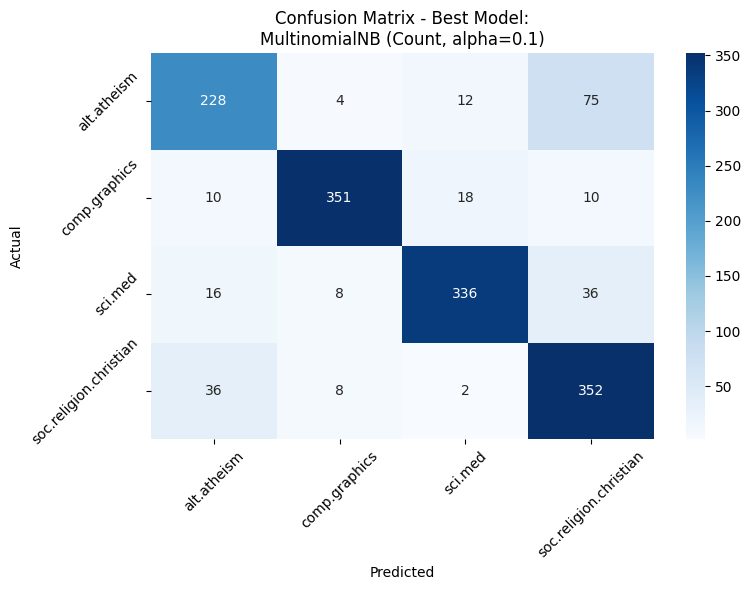

In [8]:
# پیدا کردن بهترین مدل بر اساس Accuracy
best_idx = results_df['Accuracy'].idxmax()
best_model_name = results_df.loc[best_idx, 'Model Name']
best_cm = results_df.loc[best_idx, 'Confusion Matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=newsgroups_train.target_names,
            yticklabels=newsgroups_train.target_names)
plt.title(f'Confusion Matrix - Best Model:\n{best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Selects the best model by accuracy and displays its confusion matrix as a heatmap for visual inspection.

In [9]:
print("\n" + "="*100)
print("📊 تحلیل و مقایسه مدل‌ها")
print("="*100)

# بهترین مدل بر اساس Accuracy
best_acc_model = results_df.loc[results_df['Accuracy'].idxmax(), 'Model Name']
best_acc = results_df['Accuracy'].max()

print(f"✅ بهترین مدل از نظر Accuracy: '{best_acc_model}' با دقت {best_acc:.4f}")

# بهترین مدل بر اساس F1-Score
best_f1_model = results_df.loc[results_df['F1-Score'].idxmax(), 'Model Name']
best_f1 = results_df['F1-Score'].max()

print(f"✅ بهترین مدل از نظر F1-Score: '{best_f1_model}' با F1-Score {best_f1:.4f}")

# مقایسه Multinomial vs Bernoulli
multinomial_models = results_df[results_df['Model Name'].str.contains('Multinomial')]
bernoulli_models = results_df[results_df['Model Name'].str.contains('Bernoulli')]

print(f"\n📊 میانگین Accuracy MultinomialNB: {multinomial_models['Accuracy'].mean():.4f}")
print(f"📊 میانگین Accuracy BernoulliNB: {bernoulli_models['Accuracy'].mean():.4f}")

# مقایسه CountVectorizer vs TfidfVectorizer
count_models = results_df[results_df['Model Name'].str.contains('Count')]
tfidf_models = results_df[results_df['Model Name'].str.contains('TF-IDF')]

print(f"\n📊 میانگین Accuracy CountVectorizer: {count_models['Accuracy'].mean():.4f}")
print(f"📊 میانگین Accuracy TfidfVectorizer: {tfidf_models['Accuracy'].mean():.4f}")

# تأثیر alpha
print(f"\n📌 توصیه: مقدار alpha=1 معمولاً نقطه تعادل خوبی بین bias و variance است. ولی در اینجا بهترین alpha برای هر مدل متفاوت است.")


📊 تحلیل و مقایسه مدل‌ها
✅ بهترین مدل از نظر Accuracy: 'MultinomialNB (Count, alpha=0.1)' با دقت 0.8435
✅ بهترین مدل از نظر F1-Score: 'MultinomialNB (Count, alpha=0.1)' با F1-Score 0.8443

📊 میانگین Accuracy MultinomialNB: 0.6771
📊 میانگین Accuracy BernoulliNB: 0.5995

📊 میانگین Accuracy CountVectorizer: 0.6620
📊 میانگین Accuracy TfidfVectorizer: 0.6146

📌 توصیه: مقدار alpha=1 معمولاً نقطه تعادل خوبی بین bias و variance است. ولی در اینجا بهترین alpha برای هر مدل متفاوت است.


Prints analysis and comparisons: best models by Accuracy and F1, and compares Multinomial vs Bernoulli and Count vs TF-IDF average performances.

In [10]:
# پیش‌بینی با بهترین مدل
best_model = models[results_df['Accuracy'].idxmax()][1]
y_pred_best = best_model.predict(X_test)

print("\n" + "="*100)
print("📋 گزارش کامل طبقه‌بندی برای بهترین مدل:")
print("="*100)
print(classification_report(y_test, y_pred_best, target_names=newsgroups_train.target_names))


📋 گزارش کامل طبقه‌بندی برای بهترین مدل:
                        precision    recall  f1-score   support

           alt.atheism       0.79      0.71      0.75       319
         comp.graphics       0.95      0.90      0.92       389
               sci.med       0.91      0.85      0.88       396
soc.religion.christian       0.74      0.88      0.81       398

              accuracy                           0.84      1502
             macro avg       0.85      0.84      0.84      1502
          weighted avg       0.85      0.84      0.84      1502



Uses the best model to predict on the test set and prints a detailed classification report (precision, recall, F1) per class.

In [11]:
print("\n" + "="*100)
print("📝 نتیجه‌گیری")
print("="*100)
print("""
در این تمرین، دو نوع مدل Naive Bayes (Multinomial و Bernoulli) با دو روش تبدیل متن (CountVectorizer و TfidfVectorizer) 
و با پارامترهای مختلف alpha آموزش داده شدند.

نتایج نشان می‌دهد که:

- **Multinomial Naive Bayes** معمولاً عملکرد بهتری نسبت به Bernoulli دارد، چون بر اساس فراوانی کلمات کار می‌کند.
- **TfidfVectorizer** در بسیاری از موارد عملکرد بهتری نسبت به CountVectorizer دارد، چون وزن کلمات را بر اساس اهمیت آن‌ها در کل مجموعه متنی محاسبه می‌کند.
- **پارامتر alpha** نقش مهمی در جلوگیری از overfitting دارد. مقادیر کوچکتر (مثل 0.1 یا 0.5) ممکن است منجر به بهبود عملکرد شوند.
- **Bernoulli Naive Bayes** برای متن‌های کوتاه یا وقتی که فقط وجود/عدم وجود کلمه مهم است، مناسب‌تر است.

به طور کلی، مدلی که هم دقت بالا داشته باشد و هم F1-Score خوبی داشته باشد، بهترین مدل برای این مسئله طبقه‌بندی متن است.
""")


📝 نتیجه‌گیری

در این تمرین، دو نوع مدل Naive Bayes (Multinomial و Bernoulli) با دو روش تبدیل متن (CountVectorizer و TfidfVectorizer) 
و با پارامترهای مختلف alpha آموزش داده شدند.

نتایج نشان می‌دهد که:

- **Multinomial Naive Bayes** معمولاً عملکرد بهتری نسبت به Bernoulli دارد، چون بر اساس فراوانی کلمات کار می‌کند.
- **TfidfVectorizer** در بسیاری از موارد عملکرد بهتری نسبت به CountVectorizer دارد، چون وزن کلمات را بر اساس اهمیت آن‌ها در کل مجموعه متنی محاسبه می‌کند.
- **پارامتر alpha** نقش مهمی در جلوگیری از overfitting دارد. مقادیر کوچکتر (مثل 0.1 یا 0.5) ممکن است منجر به بهبود عملکرد شوند.
- **Bernoulli Naive Bayes** برای متن‌های کوتاه یا وقتی که فقط وجود/عدم وجود کلمه مهم است، مناسب‌تر است.

به طور کلی، مدلی که هم دقت بالا داشته باشد و هم F1-Score خوبی داشته باشد، بهترین مدل برای این مسئله طبقه‌بندی متن است.



This cell prints the final conclusions and summarizes the experiment findings (in Persian). It provides a high-level takeaway about which Naive Bayes variants and vectorizers performed better and notes the role of the alpha parameter.

This markdown explains the previous cell (cell 19): it summarizes the experiment's final conclusions and highlights which Naive Bayes variants and vectorizers showed better performance, and mentions the effect of the `alpha` smoothing parameter.